## Filogenetska analiza

In [1]:
from Bio import SeqIO
from Bio import Entrez
Entrez.email = 'moj.mail@naslovu.si'

In [2]:
handle = Entrez.efetch(db='nucleotide', rettype='gb', id='NC_012920.1')

rec = SeqIO.read(handle, "gb")

### <font color="green"><b>Vaja</b></font>

Preden začnemo s filogenetsko analizo, poskusite pridobiti še neandertalov mitohondrijski genom. Recimo, zaporedje [NC_011137.1](https://www.ncbi.nlm.nih.gov/nuccore/NC_011137.1).

In [3]:
handle = Entrez.efetch(db='nucleotide', rettype='gb', id='NC_011137.1')

rec_n = SeqIO.read(handle, "gb")

In [4]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram

In [5]:
gd_diagram = GenomeDiagram.Diagram('Mitohondrijski genom neandertalca')
gd_track_for_features = gd_diagram.new_track(1, name='geni')
gd_feature_set = gd_track_for_features.new_set()

for feature in rec_n.features:
    if feature.type != "gene" and feature.type != 'D-loop':
        #Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(feature, color=color, label=True, sigil="ARROW", 
                               arrowshaft_height=1.0, arrowhead_length=0.25,
                               label_size=10, label_angle=40,
                              )

gd_diagram.draw(format="circular", orientation="landscape", pagesize='A4',
                fragments=4, start=0, end=len(rec_n), circle_core = 0.5)
gd_diagram.write("mt_lin_n.svg", "SVG")

Prikažimo oba genoma, človeškega in neandertalskega:

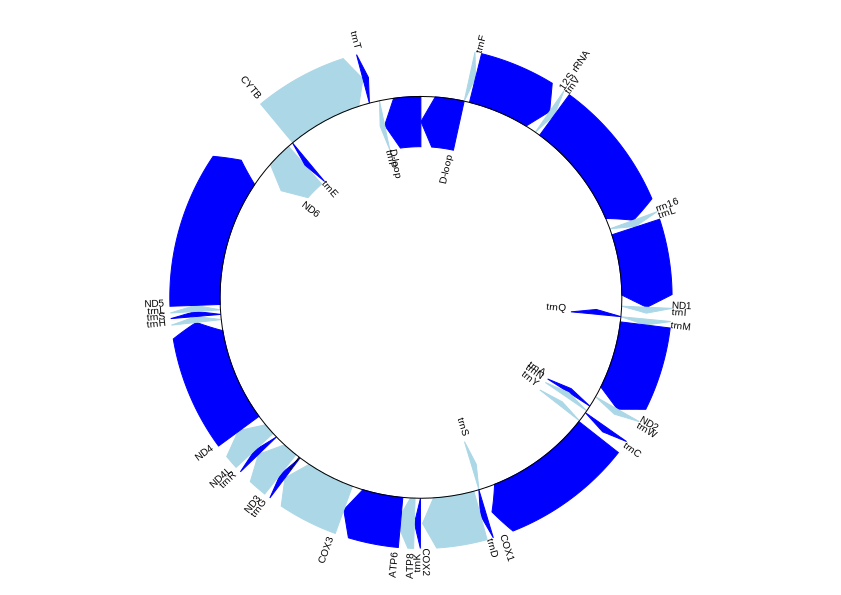

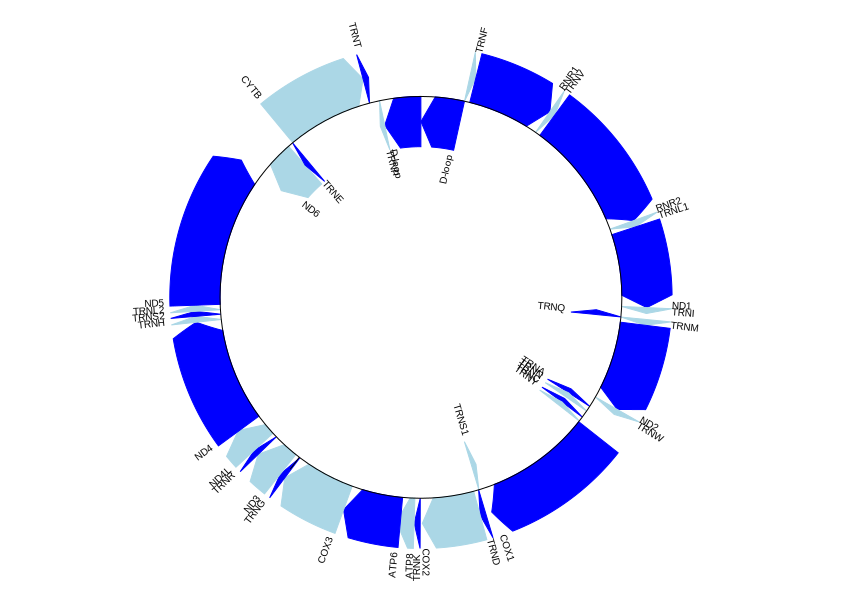

In [6]:
from IPython.display import display, SVG
display(SVG("mt_lin_n.svg"), SVG("mt_lin.svg"))

### <font color="green"><b>Vaja</b></font>
Kako podobni sta regiji `HVR`?

In [7]:
def get_Dloop(rec):
    dloops = [f for f in rec.features if f.type == 'D-loop']
    return dloops[0]

In [8]:
hvr = get_Dloop(rec)
hvr_n = get_Dloop(rec_n)

In [9]:
hvr_seq = hvr.extract(rec)
hvr_n_seq = hvr.extract(rec_n)

In [10]:
len(hvr_seq), len(hvr_n_seq)

(1122, 1118)

In [11]:
sum(n_hs==n_hn for n_hs, n_hn in zip(hvr_seq, hvr_n_seq))

885

Praktično identično. Smo ljudje torej enaki neandertalcem?

### <font color="green"><b>Vaja</b></font>

Izračunaj podobnost celotnega mitohondrijskega genoma?

In [12]:
len(rec.seq), len(rec_n.seq)

(16569, 16565)

In [13]:
sum(n_hs==n_hn for n_hs, n_hn in zip(rec.seq, rec_n.seq))

4852

Uff, še dobro! Očitno si pa le nismo tako podobni.

## Poizvedbe baze NCBI

Poiščimo še nekaj človeških mitohondrijskih genomov. Če želimo to storiti na [spletni strani NCBI](https://www.ncbi.nlm.nih.gov/nuccore), je potrebno zapisati v iskalno polje: [`"Homo sapiens"[Organism] AND mitochondrion[filter] AND complete_genome[All Fields]`](https://www.ncbi.nlm.nih.gov/nuccore?term=%22Homo%20sapiens%22%5BOrganism%5D%20AND%20mitochondrion%5Bfilter%5D%20AND%20complete_genome&cmd=DetailsSearch)


In [14]:
term = '"Homo sapiens"[Organism] AND mitochondrion[filter] AND complete_genome[All Fields]'
handle = Entrez.esearch(db="nucleotide", term=term, retmax=100000)
record = Entrez.read(handle)
id_list = sorted(set(record["IdList"]))
record["Count"], len(id_list)

('56693', 56693)

Zapisov popolnih mitohondrijskih genomov v NCBI je preko 45000!

### <font color="green"><b>Vaja</b></font>

Pridobite prvi 30 zapisov in preverite njihove dolžine.

In [15]:
seqs = []
for rid in id_list[:30]:
    print(rid)
    handle = Entrez.efetch(db="nucleotide", rettype="gb", id=rid)
    rec = SeqIO.read(handle, "gb")
    seqs.append(rec)

1001886902
1001887034
1001887157
1001887276
1001887412
1001887523
1002819669
1002819697
1002819711
1002819725
1002819739
1002819753
1002819767
1002819781
1002819795
1002819809
1002819823
1002819837
1002819851
1002819865
1002819879
1002819893
1002819907
1002819921
1002819935
1002819949
1002819963
1002819977
1002819991
1002820005


In [16]:
[len(x) for x in seqs]

[16571,
 16570,
 16570,
 16568,
 16569,
 16569,
 16567,
 16569,
 16568,
 16567,
 16567,
 16566,
 16568,
 16570,
 16567,
 16567,
 16559,
 16563,
 16561,
 16554,
 16559,
 16560,
 16560,
 16561,
 16562,
 16558,
 16562,
 16561,
 16562,
 16564]

Dolžine genomov se med posamezniki razlikujejo. Kaj pa dolžine regij HVR.

In [17]:
for seq in seqs:
    print(len(get_Dloop(seq).extract(seq)))

657
657
657
657
657
657
1121
1123
1122
1121
1121
1120
1122
1124
1121
1121
1122
1126
1124
1117
1122
1123
1123
1124
1125
1121
1125
1124
1125
1127


Ker se zaporedja med seboj očitno razlikujejo po dolžini, bi jih morali najprej poravnati.
Ker pa to presega današnjo vajo, se osredotočimo le na sekvence dolžine 1121.

In [18]:
seqs_1121 = [get_Dloop(seq).extract(seq) for seq in seqs if len(get_Dloop(seq)) == 1121]
len(seqs_1121)

6

### <font color="green"><b>Vaja</b></font>

Preverite variabilnost posameznih mest.

In [19]:
v = []
for i in range(len(seqs_1121[0])):
    tmpd = {}
    for s in seqs_1121:
        s = str(s.seq)
        tmpd[s[i]] = tmpd.get(s[i], 0) + 1
    v.append(tmpd)

In [20]:
[(i, d) for i, d in enumerate(v) if len(d) > 1]

[(61, {'C': 5, 'T': 1}),
 (62, {'T': 5, 'G': 1}),
 (63, {'G': 5, 'C': 1}),
 (64, {'G': 5, 'T': 1}),
 (66, {'T': 5, 'G': 1}),
 (67, {'A': 5, 'G': 1}),
 (68, {'G': 5, 'T': 1}),
 (69, {'G': 5, 'A': 1}),
 (70, {'A': 5, 'G': 1}),
 (71, {'T': 5, 'G': 1}),
 (72, {'G': 5, 'A': 1}),
 (73, {'G': 5, 'T': 1}),
 (75, {'C': 5, 'G': 1}),
 (77, {'G': 5, 'T': 1}),
 (81, {'T': 5, 'G': 1}),
 (82, {'T': 5, 'G': 1}),
 (83, {'G': 5, 'T': 1}),
 (85, {'A': 5, 'G': 1}),
 (87, {'T': 5, 'A': 1}),
 (88, {'G': 5, 'T': 1}),
 (89, {'A': 5, 'T': 1}),
 (90, {'T': 5, 'G': 1}),
 (91, {'G': 5, 'A': 1}),
 (92, {'A': 5, 'T': 1}),
 (95, {'T': 5, 'G': 1}),
 (96, {'T': 5, 'A': 1}),
 (97, {'A': 5, 'T': 1}),
 (98, {'G': 5, 'T': 1}),
 (99, {'T': 5, 'A': 1}),
 (100, {'A': 5, 'G': 1}),
 (101, {'G': 5, 'T': 1}),
 (102, {'T': 5, 'A': 1}),
 (103, {'A': 5, 'G': 1}),
 (105, {'G': 5, 'A': 1}),
 (106, {'G': 5, 'T': 1}),
 (108, {'A': 5, 'G': 1}),
 (110, {'T': 5, 'A': 1}),
 (112, {'G': 5, 'T': 1}),
 (114, {'A': 5, 'G': 1}),
 (116, {'G': 5,